<a href="https://colab.research.google.com/github/vedants556/Collabs/blob/main/MV_lab/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#7. Implement various advanced image filtering techniques.




Vedant Shelar

22102A0027



In [1]:
pip install numpy opencv-python scikit-image


Saving images.jpeg to images.jpeg


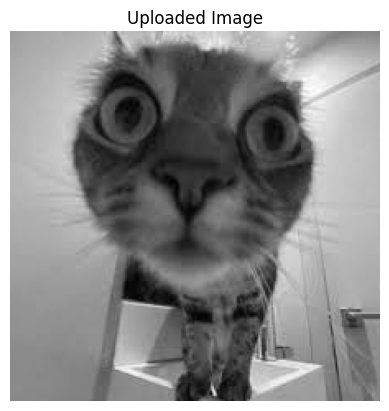

In [19]:
from google.colab import files
import cv2
import numpy as np

# Upload an image file
uploaded = files.upload()

# Read the uploaded image
image_name = list(uploaded.keys())[0]
image = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)

# Display the uploaded image
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray')
plt.title('Uploaded Image')
plt.axis('off')
plt.show()


In [20]:
from skimage import morphology

# Function for Bilateral Filtering
def bilateral_filter(image, diameter, sigma_color, sigma_space):
    return cv2.bilateralFilter(image, diameter, sigma_color, sigma_space)

# Function for Conservative Filtering
def conservative_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    new_image = data.copy()
    nrow, ncol = data.shape
    for i in range(nrow):
        for j in range(ncol):
            for k in range(i - indexer, i + indexer + 1):
                for m in range(j - indexer, j + indexer + 1):
                    if 0 <= k < nrow and 0 <= m < ncol:
                        temp.append(data[k, m])
            temp.remove(data[i, j])
            max_value = max(temp)
            min_value = min(temp)
            if data[i, j] > max_value:
                new_image[i, j] = max_value
            elif data[i, j] < min_value:
                new_image[i, j] = min_value
            temp = []
    return new_image

# Function for Morphological Erosion
def erosion(image, selem):
    return morphology.erosion(image, selem)

# Function for Morphological Dilation
def dilation(image, selem):
    return morphology.dilation(image, selem)


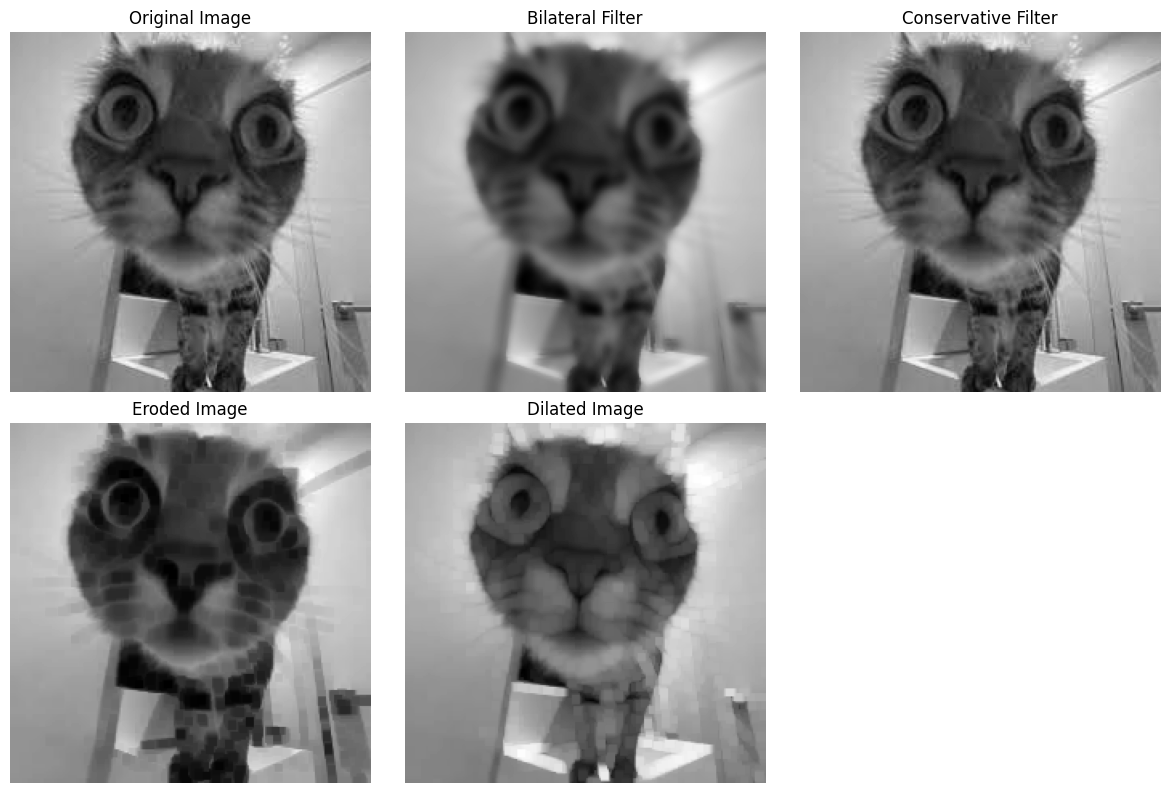

In [21]:
# Apply Bilateral Filter
bilateral_filtered = bilateral_filter(image, diameter=9, sigma_color=75, sigma_space=75)

# Apply Conservative Filter
conservative_filtered = conservative_filter(image, filter_size=5)

# Morphological Filtering
selem = np.ones((5, 5), dtype=np.uint8)  # Structuring element
eroded_image = erosion(image, selem)
dilated_image = dilation(image, selem)

# Plot the results
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Bilateral Filter')
plt.imshow(bilateral_filtered, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Conservative Filter')
plt.imshow(conservative_filtered, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Eroded Image')
plt.imshow(eroded_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Dilated Image')
plt.imshow(dilated_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

#8. Study and Implement various noise restoration techniques

Saving Screenshot (77).png to Screenshot (77).png


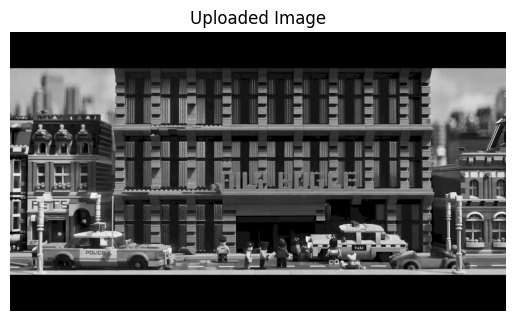

In [12]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload an image file
uploaded = files.upload()

# Read the uploaded image
image_name = list(uploaded.keys())[0]
image = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)

# Display the uploaded image
plt.imshow(image, cmap='gray')
plt.title('Uploaded Image')
plt.axis('off')
plt.show()


Total Variation Denoising


In [13]:
from skimage.restoration import denoise_tv_chambolle

def total_variation_denoising(image, weight):
    return denoise_tv_chambolle(image, weight=weight)


Bilateral Filtering



In [14]:
def bilateral_filter(image, diameter, sigma_color, sigma_space):
    return cv2.bilateralFilter(image, diameter, sigma_color, sigma_space)


 Apply the Noise Restoration Techniques

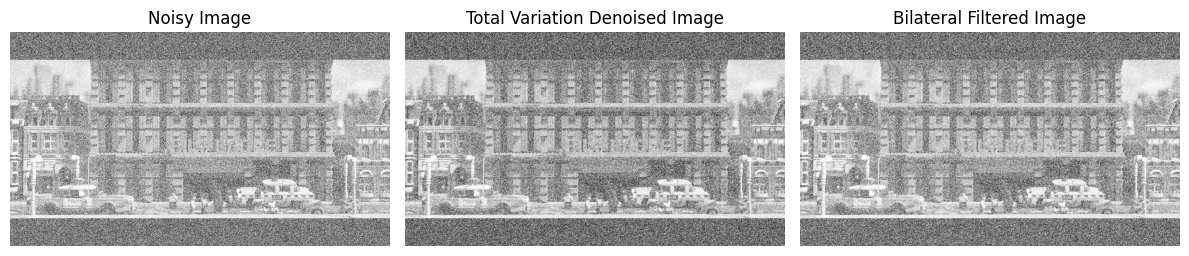

In [15]:
# Add noise to the image for demonstration purposes
noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
noisy_image = cv2.add(image, noise)

# Apply Total Variation Denoising
tv_denoised_image = total_variation_denoising(noisy_image, weight=0.1)

# Apply Bilateral Filtering
bilateral_denoised_image = bilateral_filter(noisy_image, diameter=9, sigma_color=75, sigma_space=75)

# Display results
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Total Variation Denoised Image')
plt.imshow(tv_denoised_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Bilateral Filtered Image')
plt.imshow(bilateral_denoised_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Gaussian Blurring and Restoration
python

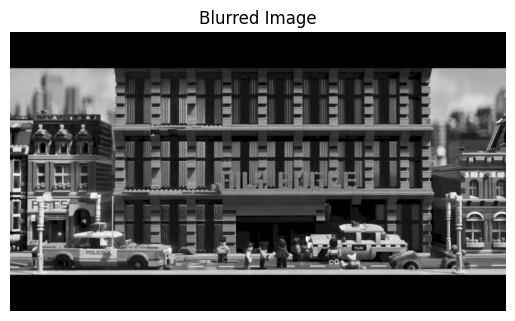

In [16]:
def gaussian_blur(image, sigma):
    return cv2.GaussianBlur(image, (5, 5), sigma)

# Blur the original image for demonstration
blurred_image = gaussian_blur(image, sigma=1)

# Display blurred image
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')
plt.show()


Inpainting Example


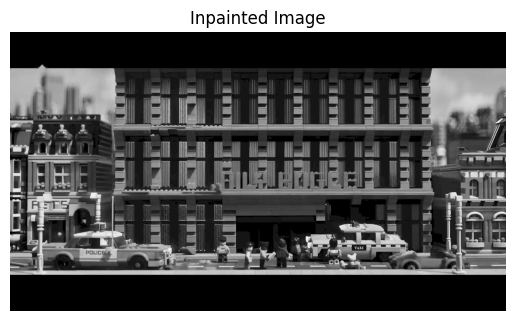

In [17]:
def inpaint_image(image, mask):
    return cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

# Create a mask for inpainting (you can modify this mask)
mask = np.zeros(image.shape, dtype=np.uint8)
mask[100:150, 100:150] = 255  # Example area to inpaint

# Inpaint the image
inpainted_image = inpaint_image(image, mask)

# Display the inpainted image
plt.imshow(inpainted_image, cmap='gray')
plt.title('Inpainted Image')
plt.axis('off')
plt.show()


Small Object Removal


You can create a mask for the object you want to remove and use inpainting:



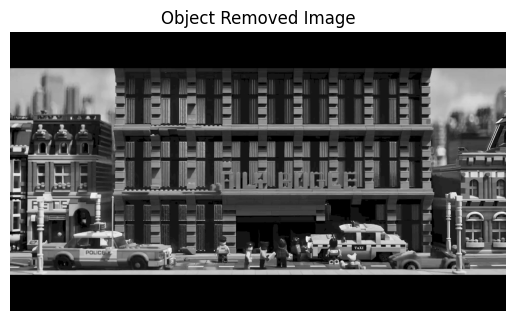

In [18]:
# Create a mask for small object removal
mask_remove = np.zeros(image.shape, dtype=np.uint8)
mask_remove[50:100, 50:100] = 255  # Example mask for object to remove

# Remove the object from the image
object_removed_image = inpaint_image(image, mask_remove)

# Display the image with the object removed
plt.imshow(object_removed_image, cmap='gray')
plt.title('Object Removed Image')
plt.axis('off')
plt.show()
